<ins><b>Deep Learning</b></ins>

<ins><b>Name :</b></ins> Jeevan Sendur G

<ins><b>Registration No.:</b></ins> CH.EN.U4.AIE22020

<ins><b>Lab-2:</b></ins> Multilayer Perceptron and Hyperparameter Tuning

# Question

- Experiment the performance of the Multilayer Perceptron on the dataset used for Perceptron Implementation. 
- Moreover, tune a Multilayer Perceptron on the Adult Dataset.

# Importing the required modules

In [1]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Modules used for Machine Learning models.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Suppressing the warnings.
import warnings 
warnings.filterwarnings('ignore')

# Comparision of the Perceptron and MLP on Credit Card Approval Dataset

## Reading the dataset

In [36]:
df = pd.read_csv("credit+approval\crx.data", header=None)

## Glimpse into the dataset

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Data Type Distribution

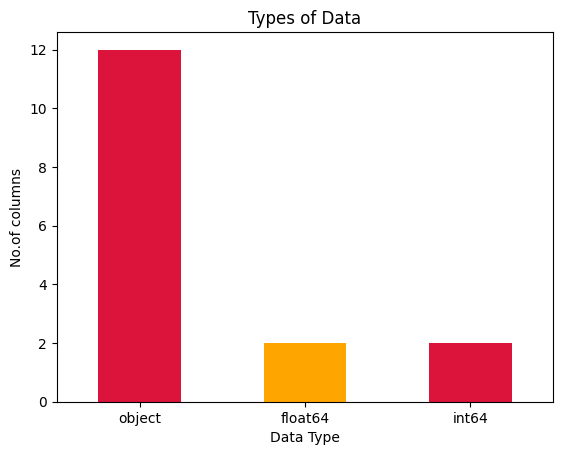

In [25]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of columns are categorical while the others are numerical.

## Seggragation of Columns

In [37]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

In [38]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

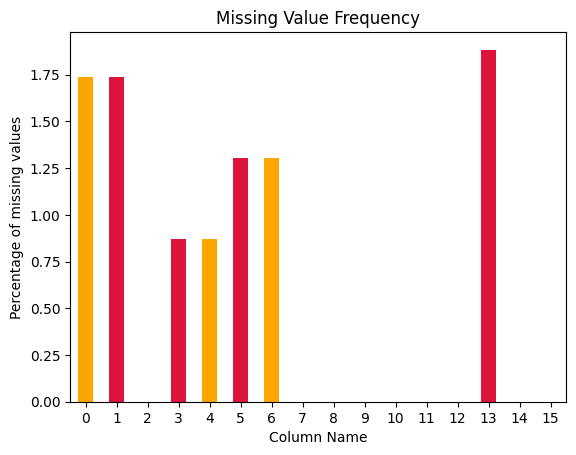

In [39]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

Only 2% of the rows are null and hence directly dropping them is feasible compared to imputation.

## Target Variable Analysis

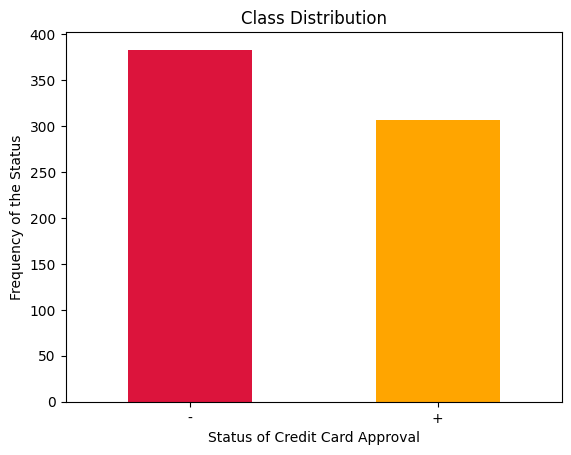

In [40]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

The dataset is biased to class "-" since it has higher instances of that class compared to others.

## Pre-processing

### Handling Missing Values

In [41]:
df = df.replace({"?":None})

In [42]:
df = df.dropna()

### Encoding the categorical variables

In [43]:
encoder = OneHotEncoder(sparse_output=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df = df.reset_index()

## Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

## Perceptron

### Training and Fitting the model

In [46]:
clf = Perceptron(random_state=0)

In [51]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [52]:
clf.fit(X_train,y_train)

Perceptron()

### Validating the model

#### Predictions from the model on the train and test dataset

In [53]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [54]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.676320272572402

#### Accuracy on the test dataset

In [55]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7575757575757576

## Multilayer Perceptron

In [56]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [57]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [58]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8909710391822828

#### Accuracy on the test dataset

In [59]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.803030303030303

## Comparative Inferences

- The Perceptron model gives an accuracy of 67% and 75% on the test and train dataset respectively.
- The MLP model gives an accuracy of 78% and 79% on the test and train dataset respectively.
- Addition of hidden layers gives better results indicating the dataset is not linearly separable.
- The MLP is able to learn a non-linear decision boundary compared to Perceptron which is a linear classifier.

# MLP on Adult Dataset

## Reading the dataset

In [63]:
adult = pd.read_csv("adult\Adult.data",header=None)

## Glimpse into the dataset

In [64]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Type Distribution

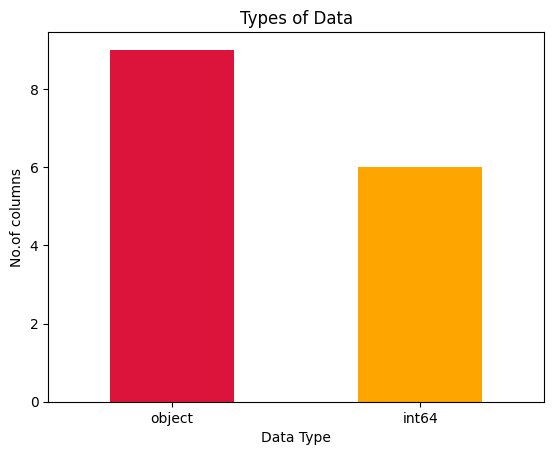

In [66]:
adult.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of the columns are categorical compared to those of numerical columns.

## Exploratory Data Analysis

### Seggregation of columns

In [67]:
cat_cols = []
num_cols = []

for i in adult.columns:
    if adult[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

### Missing Value Analysis

In [68]:
null_freq = []
for i in adult.columns:
    f = dict(adult[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(adult))
    else:
        null_freq.append(0)

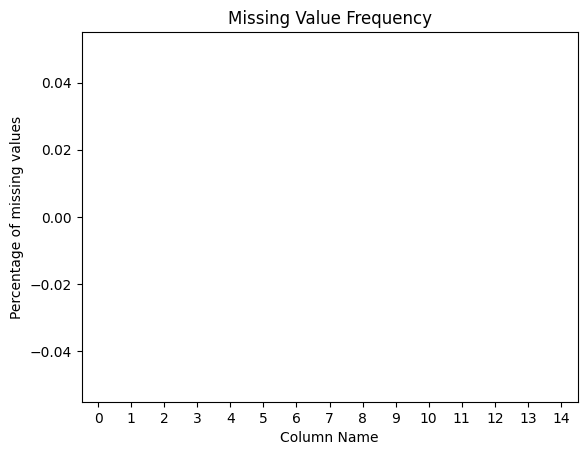

In [69]:
pd.Series(dict(zip(adult.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

There are no missing values in the dataset and hence they do not need to handled.

### Target Variable Analysis

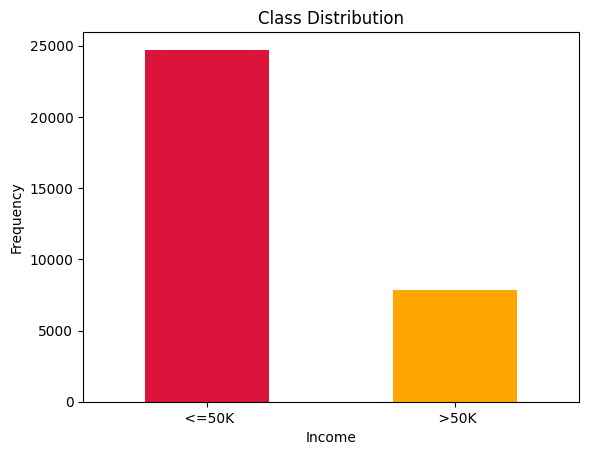

In [70]:
adult[14].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Income",
                           ylabel="Frequency",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

The dataset is biased with more instances of adults with income <=50K compared to those having income >50K.

## Preprocessing

### Encoding categorical variables

In [72]:
encoder = OneHotEncoder(sparse_output=False)
for i in cat_cols:
    adult[i] = encoder.fit_transform(adult[i].values.reshape(-1,1))

In [73]:
adult = adult.reset_index()

## Train-Test Split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(adult,
    adult[14],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(14)
X_test.pop(14)

22278    1.0
8950     1.0
7838     1.0
16505    1.0
19140    0.0
        ... 
8955     0.0
7273     1.0
6269     1.0
3760     0.0
28061    1.0
Name: 14, Length: 3257, dtype: float64

In [76]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## Multilayer Perceptron

### Using default parameters

In [77]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [78]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [79]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8325484575484575

#### Accuracy on the test dataset

In [80]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.8249923242247467

## Tuning the MLP model

### GridSearchCV for finding best parameters

In [81]:
search_space = {
    "activation":["relu","tanh"],
    "solver":["sgd","adam"],
    "learning_rate":["invscaling","constant"]
}

In [82]:
gs = GridSearchCV(clf, search_space)

In [83]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=300, random_state=1),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['invscaling', 'constant'],
                         'solver': ['sgd', 'adam']})

In [84]:
gs.best_score_

np.float64(0.7681544984402595)

In [85]:
gs.best_params_

{'activation': 'tanh', 'learning_rate': 'invscaling', 'solver': 'adam'}

### RandomSearchCV for finding best parameters

In [86]:
rs = RandomizedSearchCV(clf, search_space)

In [87]:
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=MLPClassifier(max_iter=300, random_state=1),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'learning_rate': ['invscaling',
                                                          'constant'],
                                        'solver': ['sgd', 'adam']})

In [88]:
rs.best_score_

np.float64(0.7681544984402595)

In [89]:
rs.best_params_

{'solver': 'adam', 'learning_rate': 'invscaling', 'activation': 'tanh'}

## Final Model

### Tuned model

In [90]:
clf = MLPClassifier(random_state=1, max_iter=300, solver="adam",learning_rate="invscaling",activation="tanh").fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [91]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [92]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.7693488943488943

#### Accuracy on the test dataset

In [93]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7583665950260976

### Cross Validating the model

In [95]:
# Convert column names to strings
X = adult.drop([14], axis=1)
X.columns = X.columns.astype(str)  # Convert column names to strings
y = adult[14]

# Perform cross-validation
score_lr = cross_val_score(clf, X, y, cv=10)
print(score_lr)
print("Avg:", np.average(score_lr))


[0.76665643 0.76627764 0.76904177 0.76689189 0.76719902 0.77856265
 0.77364865 0.76812039 0.76750614 0.76597052]
Avg: 0.7689875105518337


## Final Conclusion

- The MLP model gives an accuracy of 77% and 78% on test and train data respectively after tuning it using GridSearchCV and RandomSearchCV. 
- On Cross Validation, it gives an averaged accuracy of 76%.